In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = np.random.randint(1, 8, 20)
data

array([3, 5, 1, 3, 4, 6, 3, 1, 5, 7, 7, 2, 3, 2, 5, 1, 5, 7, 1, 5])

In [7]:
designation = list(map(lambda x : 0 if x <= 4 else 1, data))

In [8]:
designation

[0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1]

In [31]:
df = pd.DataFrame(data.reshape(-1, 1), columns= ["Exp"])
df["Dsg"] = designation

In [32]:
df.head() # 0 - Associate, 1 - Manager

,Exp,Dsg
0,3,0
1,5,1
2,1,0
3,3,0
4,4,0


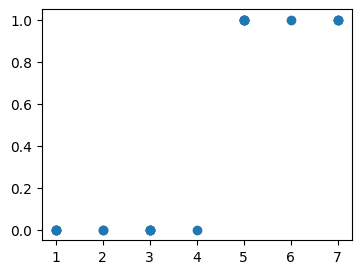

In [35]:
plt.figure(figsize=(4,3))
plt.scatter(df["Exp"], df["Dsg"])
plt.show()

In [36]:
new_exp = np.array([2.5])
new_exp

array([2.5])

In [37]:
k = 3

In [38]:
distances = np.sqrt((new_exp - df["Exp"])**2)
distances

0     0.5
1     2.5
2     1.5
3     0.5
4     1.5
5     3.5
6     0.5
7     1.5
8     2.5
9     4.5
10    4.5
11    0.5
12    0.5
13    0.5
14    2.5
15    1.5
16    2.5
17    4.5
18    1.5
19    2.5
Name: Exp, dtype: float64

In [39]:
sorted(distances)

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 3.5,
 4.5,
 4.5,
 4.5]

In [40]:
new_df = df.copy()
new_df["dist"] = distances

In [41]:
new_df.head()

,Exp,Dsg,dist
0,3,0,0.5
1,5,1,2.5
2,1,0,1.5
3,3,0,0.5
4,4,0,1.5


In [42]:
new_df.sort_values("dist").head(k)

,Exp,Dsg,dist
0,3,0,0.5
3,3,0,0.5
6,3,0,0.5


In [43]:
from sklearn.datasets import make_blobs

In [44]:
data = make_blobs(n_samples=100, n_features=2, centers=[[2,3], [5,6]])

In [45]:
df = pd.DataFrame(data[0], columns=["Col_1", "Col_2"])
df["Target"] = data[1]
df.head()

,Col_1,Col_2,Target
0,3.042405,5.434579,1
1,7.765130,5.936845,1
2,6.943675,5.907096,1
3,3.606081,6.538452,1
4,3.585028,6.141918,1


In [46]:
new_pt = np.array([4.653342, 3.365422])
new_pt

array([4.653342, 3.365422])

In [70]:
X = data[0]
X
y = data[1]

In [54]:
dist = [np.sqrt(((new_pt[0] - X[i][0])**2) + ((new_pt[1] - X[i][1])**2)) for i in range(len(X))]

In [55]:
dist

[2.6223132652980894,
 4.036761176512978,
 3.42136364452162,
 3.341388082699659,
 2.974933304825815,
 4.373394200140627,
 2.5766071060406324,
 1.4919852616588207,
 2.462823596371569,
 3.3663052954525194,
 4.165607021144078,
 1.6689280096797685,
 3.8831390316046424,
 4.056782425161287,
 1.8667781288347611,
 3.5445293998579652,
 3.0604544871819073,
 0.827649428778575,
 3.379282299685429,
 4.162091866948328,
 1.3625328946428914,
 3.834377890377413,
 4.224550580511152,
 1.4240900444046565,
 2.0224295072258145,
 2.9355033102936847,
 2.57589132758964,
 4.790906558861759,
 2.7700537829031897,
 2.3126798730471636,
 2.740322123403987,
 2.4992120501204638,
 2.7406673892082125,
 1.9438064006499256,
 1.215874281779659,
 2.2927557622923866,
 2.5188825300880144,
 2.1611233724572285,
 1.3009054881942794,
 0.922891918593983,
 2.9149343360516964,
 3.396453914653782,
 2.749918296586954,
 3.1299045547158073,
 2.556619771176959,
 3.4151865510929382,
 4.666413679200557,
 5.420126709275605,
 1.98804932940141

In [57]:
df["dist"] = dist

In [58]:
df.head()

,Col_1,Col_2,Target,dist
0,3.042405,5.434579,1,2.622313
1,7.765130,5.936845,1,4.036761
2,6.943675,5.907096,1,3.421364
3,3.606081,6.538452,1,3.341388
4,3.585028,6.141918,1,2.974933


In [66]:
df.sort_values("dist").head(5)

,Col_1,Col_2,Target,dist
56,4.585063,3.646526,1,0.289277
92,4.448219,2.791058,0,0.609893
17,4.042709,3.924108,1,0.827649
82,5.032524,4.104784,1,0.830924
39,3.747211,3.540510,0,0.922892


In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
model = KNeighborsClassifier(n_neighbors=5)

In [71]:
model.fit(X, y)

KNeighborsClassifier()

In [73]:
model.predict([new_pt])

array([1])